In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import pymc3 as pm # NOTE: I am using version 3.4 installed via conda / conda-forge

import matplotlib.pyplot as plt

In [3]:
datafile = "location_data_hw9_2018.csv"

In [4]:
df = pd.read_csv(datafile)

In [5]:
df.head()

,t,red_pos_X,red_pos_Y,blue_pos_X,blue_pos_Y
0,1.718397,1.330174,0.993564,1.081700,-1.295918
1,2.998056,1.310404,1.012772,1.004997,-1.254394
2,6.015073,1.270312,1.028386,1.113696,-1.321257
3,8.267651,1.331131,0.948223,1.001845,-1.285209
4,9.279321,1.346159,0.963485,1.113008,-1.261147


In [7]:
df.head()

,t,red_pos_X,red_pos_Y,blue_pos_X,blue_pos_Y
0,1.718397,1.330174,0.993564,1.081700,-1.295918
1,2.998056,1.310404,1.012772,1.004997,-1.254394
2,6.015073,1.270312,1.028386,1.113696,-1.321257
3,8.267651,1.331131,0.948223,1.001845,-1.285209
4,9.279321,1.346159,0.963485,1.113008,-1.261147


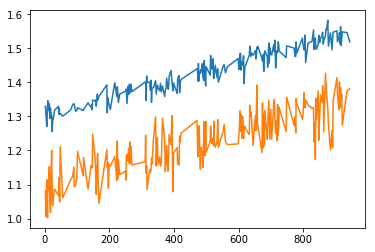

In [12]:
plt.plot(df.t, df.red_pos_X)
plt.plot(df.t, df.blue_pos_X)

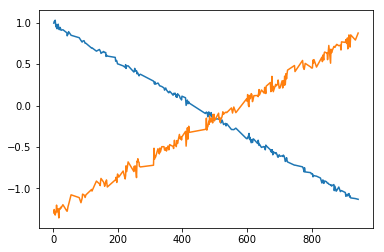

In [13]:
plt.plot(df.t, df.red_pos_Y)
plt.plot(df.t, df.blue_pos_Y)

In [26]:
def do_glm(formula, df):
    with pm.Model() as model:
        pm.glm.GLM.from_formula(formula, df)
        trace = pm.sample(3000, tune=2000) # default tune of 500 was producing a warning so I upped it
        return trace
    
def plot_trace(trace):
    pm.plot_posterior(trace,label='posterior predictive regression lines',round_to=6)
    pm.traceplot(trace[100:])

### Approach:

Estimate separate Vx and Vy components in the original coordinates, since we need them for later parts. I had originally recast the problem in terms of dispalcement from some origin, so that I could just estimate the speed without doing the x and y components separately, but this turned out to be very useful for subsequent parts of the assignment, so I abandoned the approach (and deleted all those cells). Here I use the from_formula() method to estimate

position = Intercept + speed \* time + error

Where speed is called "t" and error "sd" in the following cells.

In [61]:
redx_trace = do_glm("red_pos_X ~ t", df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, t, Intercept]
100%|██████████| 5000/5000 [00:17<00:00, 287.37it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,1.302374,0.002826,4.822555e-05,1.296926,1.307966,3623.723460,0.999833
t,0.000258,0.000005,8.794924e-08,0.000249,0.000268,3527.207689,0.999921
sd,0.021352,0.000995,1.487972e-05,0.019438,0.023337,3452.418698,0.999834


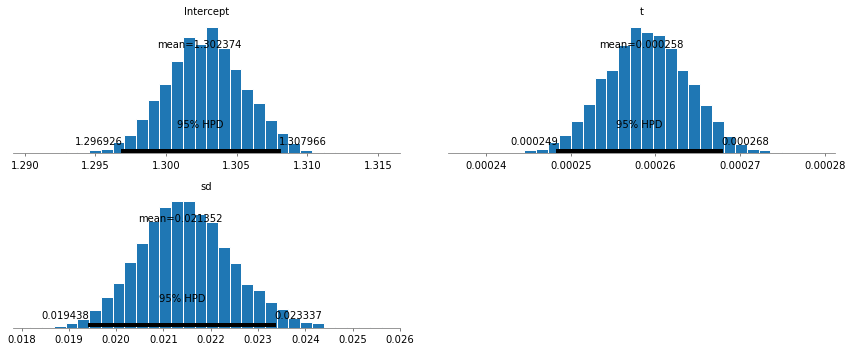

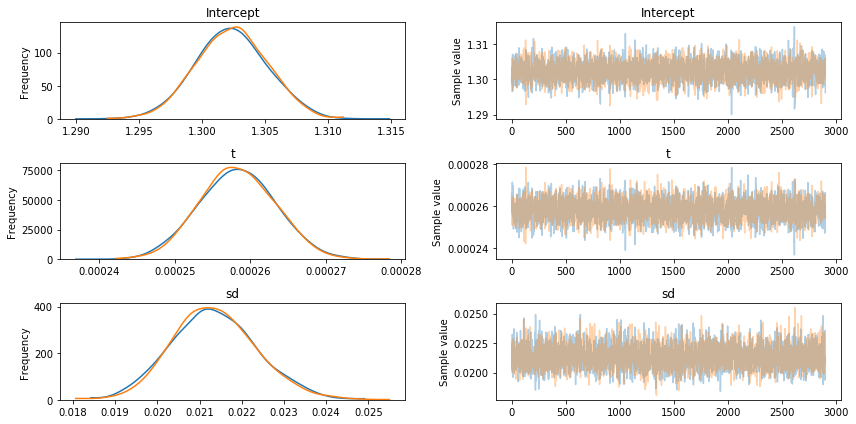

In [62]:
plot_trace(redx_trace)
rx_post = pm.summary(redx_trace)
rx_post

In [17]:
redy_trace = do_glm("red_pos_Y ~ t", df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, t, Intercept]
100%|██████████| 5000/5000 [00:31<00:00, 157.13it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,0.981887,0.002576,4.706786e-05,0.976789,0.986955,2704.949196,1.001372
t,-0.002263,0.000005,8.594514e-08,-0.002272,-0.002254,2994.858494,1.001934
sd,0.019257,0.000900,1.519155e-05,0.017380,0.020939,3730.888163,1.000283


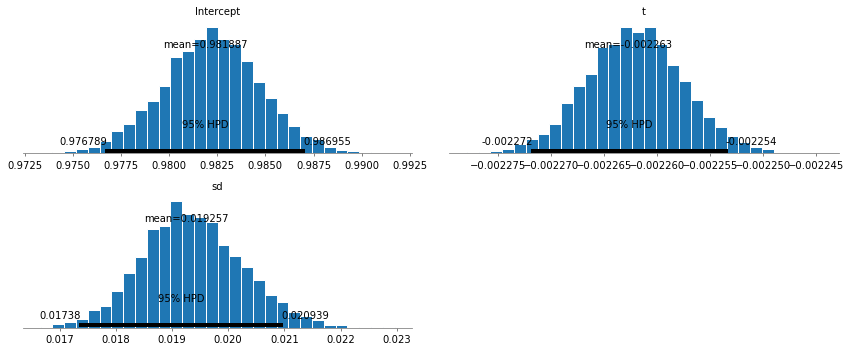

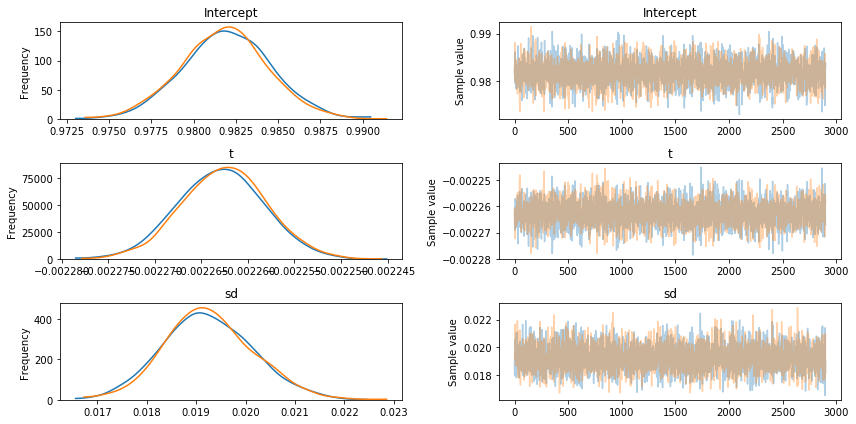

In [29]:
plot_trace(redy_trace)
ry_post = pm.summary(redy_trace)
ry_post

In [19]:
bluex_trace = do_glm("blue_pos_X ~ t", df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, t, Intercept]
100%|██████████| 5000/5000 [00:22<00:00, 218.26it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,1.093369,0.006438,1.137989e-04,1.080538,1.105451,3273.936638,0.999904
t,0.000271,0.000011,2.036499e-07,0.000249,0.000294,3306.959685,0.999834
sd,0.048345,0.002193,3.031268e-05,0.044287,0.052739,4650.546976,1.000049


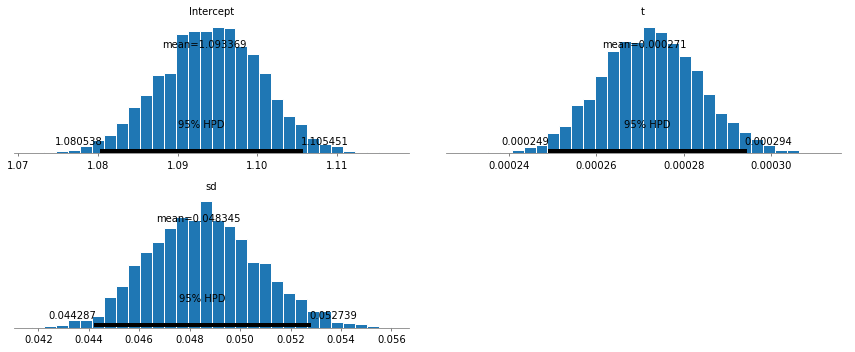

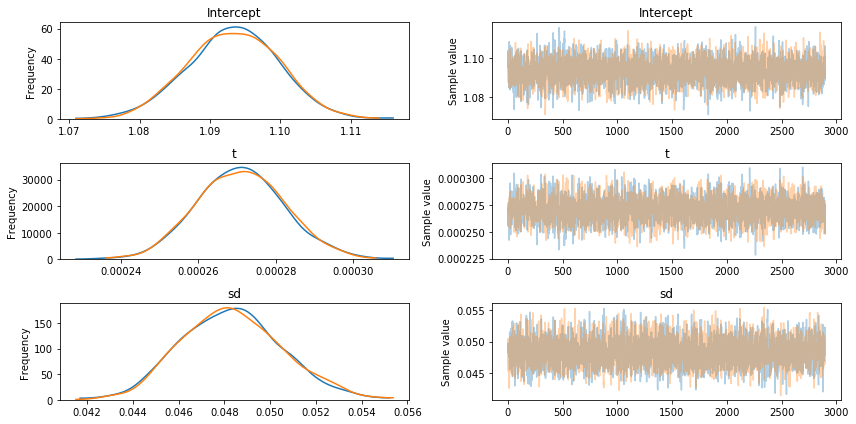

In [30]:
plot_trace(bluex_trace)
bx_post = pm.summary(bluex_trace)
bx_post

In [21]:
bluey_trace = do_glm("blue_pos_Y ~ t", df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, t, Intercept]
100%|██████████| 5000/5000 [00:38<00:00, 128.99it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-1.304337,0.006296,1.010521e-04,-1.316326,-1.292074,3087.379324,1.000011
t,0.002270,0.000011,1.893680e-07,0.002248,0.002292,3024.306282,0.999976
sd,0.048359,0.002267,3.349587e-05,0.044077,0.052927,4091.844917,1.000039


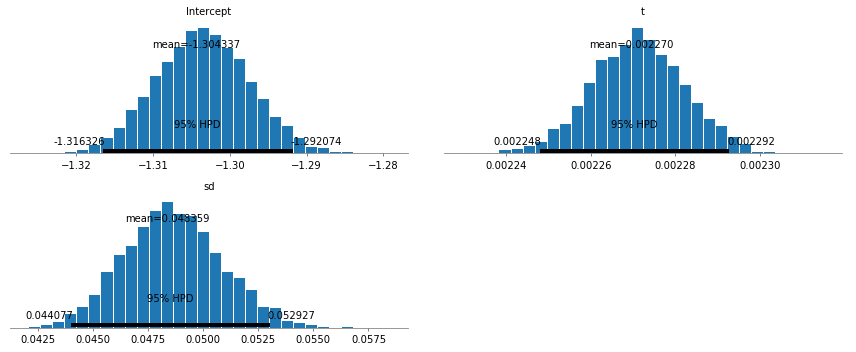

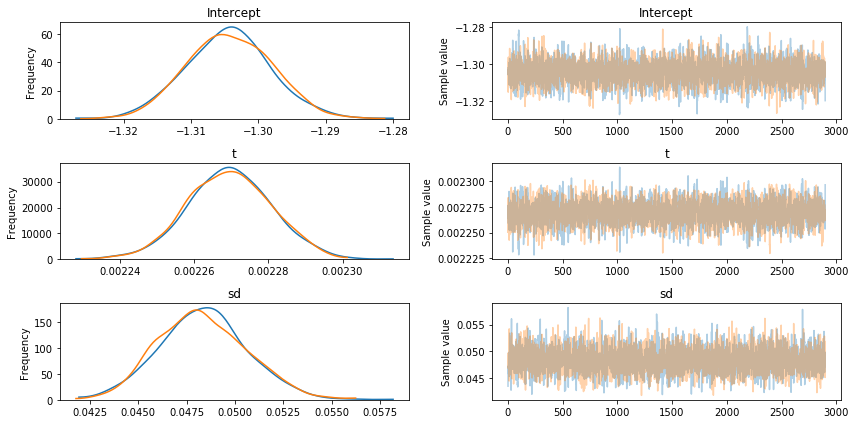

In [31]:
plot_trace(bluey_trace)
by_post = pm.summary(bluey_trace)
by_post

### Answer to part A

Now we have the individual x and y components of each velocity, and we have it all expressed in the original coordinates, which will help with parts B and C. To answer A, though, we do this:

**red velocity**

= sqrt(red_vx^2 + red_vy^2)

In [35]:
np.sqrt(rx_post['mean']['t']**2 + ry_post['mean']['t']**2)

0.0022773805279964056

**blue velocity**

In [36]:
np.sqrt(bx_post['mean']['t']**2 + by_post['mean']['t']**2)

0.0022856647920648917

### Approach to part B

We want to find the first t where two conditions are true, one on each of the object's positions. So let's see when these conditions come true independently. The one that takes longer to become true will dictate this time.

In particular, dividing the intercept by the speed in the y direction (shown as 't' in my variables) will tell us when the object crosses the y=0 line.

In [45]:
np.abs(ry_post['mean']['Intercept']/ry_post['mean']['t'])

433.9477073929292

In [44]:
ry_post

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,0.981887,0.002576,4.706786e-05,0.976789,0.986955,2704.949196,1.001372
t,-0.002263,0.000005,8.594514e-08,-0.002272,-0.002254,2994.858494,1.001934
sd,0.019257,0.000900,1.519155e-05,0.017380,0.020939,3730.888163,1.000283


In [46]:
np.abs(by_post['mean']['Intercept']/by_post['mean']['t'])

574.71298933511537

### Answer to part B

So it appears that the blue object will take longer to cross Y=0, and so we should just estimate the 5/95 confidence intervals for this quantity. These are:

In [59]:
qs = pm.stats.quantiles(bluey_trace, qlist=[5, 95])
qs[0]['Intercept'][5]/qs[0]['t'][5]

-584.07349267724226

In [60]:
qs[0]['Intercept'][95]/qs[0]['t'][95]

-565.35958182968443

**So the 5%/95% confidence interval is 565.36 to 584.07 seconds.**

### Approach to part C

If we introduce the new constraint that sqrt(Vx^2 + Vy^2) is the same for both objects, we could now add this information to our priors for setting up the model. Above, I use the from_formula() method of specifying the model, and I let all the variables be Normal. If instead I had manually set up the model, I could do hierarchical modeling where the speed parameter was shared between the two objects. But it's pretty close to the due date, so I don't think I have time to get this right.

### Approach/Answer to part D

If we use only the first 100 samples from the trace, the estimates should have a bigger error, right?

In [66]:
rx_post_100 = pm.summary(redx_trace[:100])
ry_post_100 = pm.summary(redy_trace[:100])
bx_post_100 = pm.summary(bluex_trace[:100])
by_post_100 = pm.summary(bluey_trace[:100])

In [64]:
rx_post_100

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,1.302886,0.003150,2.733111e-04,1.297154,1.308985,59.993963,1.020669
t,0.000257,0.000006,4.750425e-07,0.000247,0.000268,55.069199,1.025881
sd,0.021299,0.000968,7.699563e-05,0.019688,0.023410,83.085810,1.002463


In [65]:
rx_post

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,1.302374,0.002826,4.822555e-05,1.296926,1.307966,3623.723460,0.999833
t,0.000258,0.000005,8.794924e-08,0.000249,0.000268,3527.207689,0.999921
sd,0.021352,0.000995,1.487972e-05,0.019438,0.023337,3452.418698,0.999834


In [67]:
np.sqrt(rx_post_100['mean']['t']**2 + ry_post_100['mean']['t']**2)

0.0022766915638735355

In [68]:
np.sqrt(bx_post_100['mean']['t']**2 + by_post_100['mean']['t']**2)

0.0022861256719494743

So here it looks like the Intercept and speed estimates are roughly the same, but with a slightly higher standard deviation than when we used the full trace. I wonder what would have happened if we had used samples before the burin-in/tune period...

In [69]:
qs = pm.stats.quantiles(bluey_trace[:100], qlist=[5, 95])
qs[0]['Intercept'][5]/qs[0]['t'][5]

-584.19569062400444

In [70]:
qs[0]['Intercept'][95]/qs[0]['t'][95]

-565.47190458102614

Again, these numbers look very similar to the ones obtained using the full trace. I suspect this is because the Markov chain has converged nicely (after those 2000 tuning steps) so even a few sam